In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline # 최신버전에서는 필요없다. 셀에 차트가 안그려지는 버전에서 쓰면 된다.

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Age = Nan값을 데이터 평균값으로 채운다.
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
# 기온데이터처럼 연속적인 데이터의 경우 bfill, ffill 메소드 등을 이용할 수 있다.

# 선실번호, 중간정착항구의 누락값은 'N'으로 채운다.
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [5]:
titanic_df.isnull().sum() # NaN 데이터의 수를 확인

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
# 숫자가 아닌 데이터는 머신러닝 알고리즘에 사용될 수 없으니 숫자로 바꿔줘야한다.
# 이름, 성별, 티켓, 선실번호, 중간정착항구
titanic_df['Sex'].value_counts()
# value_counts()는 NaN 값은 제외하고 집계한다.
# 그러므로 전처리가 된 후 사용해야한다.

male      577
female    314
Name: Sex, dtype: int64

In [7]:
titanic_df['Cabin'].value_counts()
# 비상구와 가까운 선실번호를 알 수 있다면.
# 여기서는 선실번호의 첫글자 알파벳만 살린다.

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [8]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [9]:
# 선실번호의 앞 글자만 떼온다.
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]

In [10]:
titanic_df['Cabin'].value_counts()
# 선실번호는 누락 데이터가 687개

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [11]:
# 지수표현 1.0e+5 = 1*10^5 / 1.0e-1 = 1*10^-1

In [12]:
# matplotlib 은 데이터를 집계내고서 차트를 출력할 수 있고
# seaborn 은 자동으로 데이터를 집계내준다.

In [13]:
# 성별 생존자별 인원수 확인
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

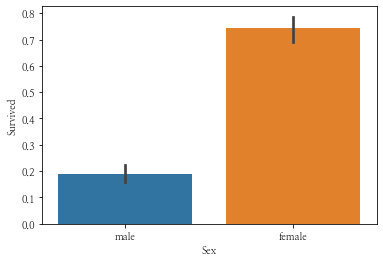

In [14]:
# 전체 생존자 대비 남녀비율
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

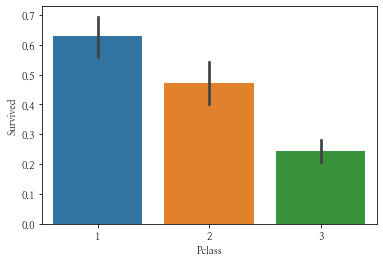

In [15]:
# 선실등급별 생존비율
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

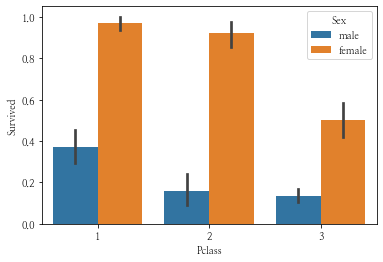

In [16]:
# 선실등급별 남녀생존비율
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [17]:
# 나이대별 구분
titanic_df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

<AxesSubplot:>

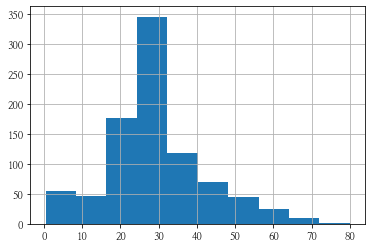

In [18]:
titanic_df['Age'].hist()

In [19]:
def get_category(age):
    cat = ''
    
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat
# 연령대 구분 함수

In [20]:
get_category(33)

'Young Adult'

In [21]:
# 데이터 추출해서 새 컬럼에 저장
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young Adult


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

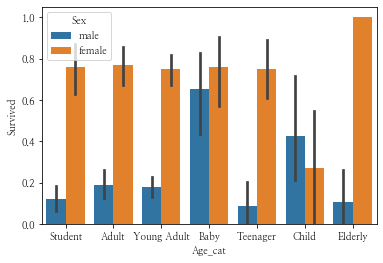

In [23]:
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df)
# Unknown 이 빠졌다.
# 나이대별 순서대로 표시하고 싶다.

In [24]:
# X축의 값의 순서 지정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

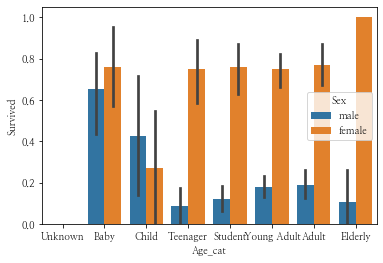

In [25]:
sns.barplot(x='Age_cat', y='Survived', hue='Sex', order=group_names, data=titanic_df)
#order, hue_order : 차트 표시 순서 지정, list 형태

In [26]:
# Child 는 안고가기에는 어려워 스스로 생존하기에 쉽지 않았을 수 있다.

In [27]:
# 막대그래프의 사이즈 설정 (inch)
plt.figure(figsize=(10, 6))
# seaborn을 쓰더라도 matplotlib에서 차트형식을 가져다 쓴다.

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [28]:
# 필요없으니 제거, 머신러닝 알고리즘에 숫자만 필요하다.
titanic_df.drop(columns='Age_cat', inplace=True)

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [30]:
# 숫자로 인코딩
# 성별은 2개 뿐이니 LABEL ENCODING

In [31]:
# from sklearn.preprocessing import LabelEncoder
# 함수 안에 같이 넣어주면 편리하다.

In [32]:
def encode_features(dataDF):
    from sklearn.preprocessing import LabelEncoder
    features = ['Cabin', 'Sex', 'Embarked'] # 컬럼 이름을 리스트목록으로 저장
    for feature in features:
        le = LabelEncoder() # LabelEncoder 객체 생성
        # le = le.fit(dataDF[feature]) # 들어오는 데이터프레임의 목록을 받아 학습
        # dataDF[feature] = le.transform(dataDF[feature]) # 숫자로 변환
        dataDF[feature] = le.fit_transform(dataDF[feature]) # 위 두 줄을 함축
        print(le.classes_) # 인코딩 속성값
        
    return dataDF # 변환된 데이터프레임 반환

In [33]:
encode_features(titanic_df) # 데이터프레임에는 숫자가 들어가고, 인코딩된 속성값을 출력했다.

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0


In [34]:
titanic_df.head() # 숫자로 모두 바뀌었다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 사용자 함수 정의

In [35]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplaace=True) # 요금 누락값 0원으로 채우기
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerID', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# LABEL ENCODING
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1] # 승선실번호 앞 글자만 따옴
    features = ['Cabin', 'Sex', 'Embarked'] # 컬럼 이름을 리스트목록으로 저장
    for feature in features:
        le = LabelEncoder() # LabelEncoder 객체 생성
        # le = le.fit(dataDF[feature]) # 들어오는 데이터프레임의 목록을 받아 학습
        # dataDF[feature] = le.transform(dataDF[feature]) # 숫자로 변환
        df[feature] = le.fit_transform(df[feature]) # 위 두 줄을 함축
        print(le.classes_) # 인코딩 속성값
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df